In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [3]:
bos = pd.read_csv('boston.csv')

### RFE - Recursive Feature Elimination

#### Works by checking the coef_ in case of LiR (standardization compulsory) and Feature importance in case of LoR

In [25]:
y = bos['price']
X = bos.drop('price', axis=1)

In [27]:
cols = list(X.columns)
cols.remove('CHAS')
for col in cols:
    X[col+'2'] = X[col]**2
    X[col+'6'] = X[col]**6
    
cols = list(X.columns)
cols

['Unnamed: 0',
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'Unnamed: 02',
 'Unnamed: 06',
 'CRIM2',
 'CRIM6',
 'ZN2',
 'ZN6',
 'INDUS2',
 'INDUS6',
 'NOX2',
 'NOX6',
 'RM2',
 'RM6',
 'AGE2',
 'AGE6',
 'DIS2',
 'DIS6',
 'RAD2',
 'RAD6',
 'TAX2',
 'TAX6',
 'PTRATIO2',
 'PTRATIO6',
 'B2',
 'B6',
 'LSTAT2',
 'LSTAT6']

In [29]:
X.shape

(506, 40)

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

In [33]:
lir = LinearRegression()

#stop the search when only the last feature is left
rfe = RFE(lir, n_features_to_select=10, verbose =3)
rfe.fit(Xs,y)

print(rfe.support_)
print(rfe.ranking_)
print(list(Xs.columns))

Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 fe

In [34]:
rf = pd.DataFrame(rfe.ranking_, index=X.columns, columns=['support'])
rf2 = rf[rf['support']==1]
list(rf2.index)

['NOX', 'RM', 'RAD', 'TAX', 'NOX2', 'RM2', 'RAD2', 'RAD6', 'TAX2', 'TAX6']

In [37]:
rf.sort_values(by='support')

,support
NOX2,1
RM2,1
TAX6,1
TAX2,1
RAD6,1
NOX,1
RM,1
RAD2,1
RAD,1
TAX,1


In [39]:
lir = LinearRegression()
lir.fit(Xs,y)

lirc = pd.DataFrame(lir.coef_, index = Xs.columns, columns=['coeff'])
lirc['coeff_abs'] = np.abs(lirc['coeff'])
lirc = lirc.sort_values(by='coeff_abs', ascending=False)
lirc

,coeff,coeff_abs
TAX2,29.750630,29.750630
NOX2,-25.914919,25.914919
RM2,23.808674,23.808674
TAX,-22.089359,22.089359
RAD2,-20.751815,20.751815
RM,-19.580017,19.580017
NOX,18.546768,18.546768
PTRATIO2,18.063454,18.063454
PTRATIO,-17.401585,17.401585
RAD6,11.723388,11.723388


In [41]:
## select the best number to keep in RFE
noof_cols = 37
score_list=[]; score_list2=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) 

ss = StandardScaler()
X_trains = ss.fit_transform(X_train)
X_trains = pd.DataFrame(X_trains, columns=X.columns)
X_tests = ss.transform(X_test)
X_tests = pd.DataFrame(X_tests, columns=X.columns)

for n in range(noof_cols):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n+1)
    rfe.fit(X_trains, y_train)
    
    score = rfe.score(X_trains, y_train)
    score_list.append(score)  
    
    score2 = rfe.score(X_tests, y_test)
    score_list2.append(score2)

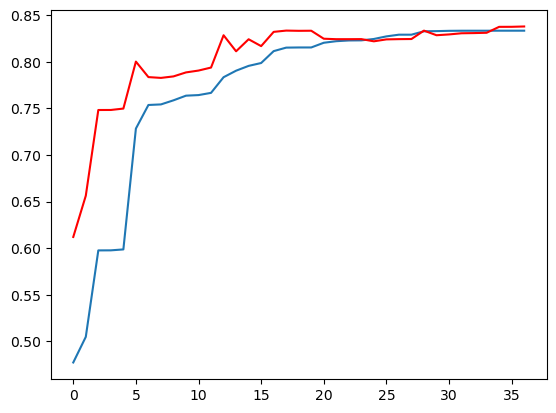

In [42]:
plt.plot(score_list)
plt.plot(score_list2, 'r')
plt.show()

In [43]:
idx = np.linspace(1, 37, 37)
pd.DataFrame(score_list2, index=idx, columns=['r-sq'])

,r-sq
1.0,0.612090
2.0,0.656327
3.0,0.748347
4.0,0.748385
5.0,0.749886
6.0,0.800301
7.0,0.783665
8.0,0.782806
9.0,0.784410
10.0,0.788699


In [44]:
Xs.shape

(506, 40)

In [45]:
from sklearn.model_selection import KFold, GridSearchCV

folds = KFold(n_splits = 3, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 38))}]

lir = LinearRegression()
rfe = RFE(lir)             

model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, 
                        return_train_score=True, verbose = 1)      

model_cv.fit(Xs, y)          

Fitting 3 folds for each of 37 candidates, totalling 111 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [46]:
model_cv.best_params_

{'n_features_to_select': 33}

In [47]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.iloc[:,5:]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,{'n_features_to_select': 1},0.127372,0.150171,0.546631,0.274725,0.192492,37,0.172992,0.160254,0.502260,0.278502,0.158306
1,{'n_features_to_select': 2},0.130725,0.163546,0.577515,0.290595,0.203325,36,0.183644,0.164259,0.535660,0.294521,0.170695
2,{'n_features_to_select': 3},0.152295,0.227267,0.670463,0.350008,0.228653,35,0.186913,0.245853,0.627406,0.353391,0.195247
3,{'n_features_to_select': 4},0.441737,0.227463,0.670280,0.446493,0.180811,34,0.649670,0.251048,0.627415,0.509378,0.182893
4,{'n_features_to_select': 5},0.526834,0.203601,0.672130,0.467522,0.195820,33,0.667464,0.263724,0.628359,0.519849,0.181810
5,{'n_features_to_select': 6},0.555345,0.372361,0.681634,0.536447,0.126966,31,0.678113,0.354737,0.643918,0.558923,0.145054
6,{'n_features_to_select': 7},0.546813,0.378195,0.681950,0.535653,0.124258,32,0.680635,0.356029,0.644006,0.560224,0.145160
7,{'n_features_to_select': 8},0.551313,0.442772,0.684020,0.559368,0.098653,30,0.681296,0.443743,0.650629,0.591889,0.105501
8,{'n_features_to_select': 9},0.564828,0.444391,0.771543,0.593587,0.135098,29,0.697390,0.444045,0.746298,0.629244,0.132469
9,{'n_features_to_select': 10},0.566805,0.628925,0.793901,0.663210,0.095829,28,0.697772,0.686301,0.762924,0.715665,0.033743


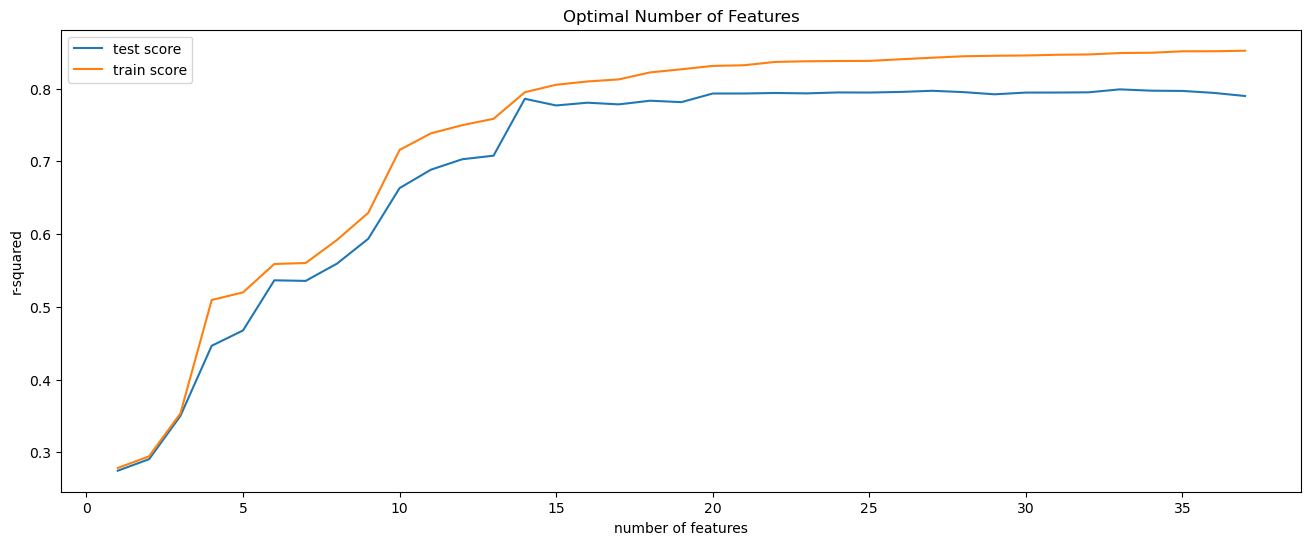

In [48]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [49]:
model_cv.best_params_

{'n_features_to_select': 33}

In [50]:
# final model
lir = LinearRegression()
rfe = RFE(lir, **model_cv.best_params_)  

rfe = rfe.fit(X_trains, y_train)
y_pred = rfe.predict(X_tests)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8309020578390311


In [51]:
cols = pd.DataFrame(list(zip(X_trains.columns, rfe.support_, rfe.ranking_)), 
                    columns=['cols', 'select', 'rank']).sort_values(by='rank')
cols.head(37)

,cols,select,rank
19,ZN6,True,1
22,NOX2,True,1
23,NOX6,True,1
24,RM2,True,1
25,RM6,True,1
26,AGE2,True,1
27,AGE6,True,1
28,DIS2,True,1
29,DIS6,True,1
30,RAD2,True,1


### RFE CV

In [53]:
from sklearn.feature_selection import RFECV
lir = LinearRegression()

rfecv = RFECV(estimator=lir, cv=3, scoring='r2')
rfecv.fit(Xs, y)

RFECV(cv=3, estimator=LinearRegression(), scoring='r2')

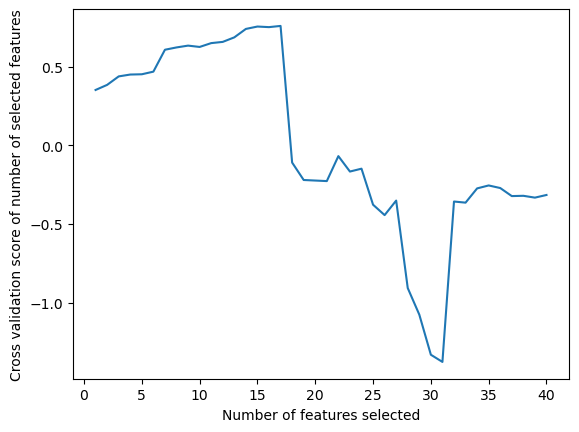

In [55]:
cvr = pd.DataFrame(rfecv.cv_results_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(cvr.index+1, cvr['mean_test_score'])
plt.show()

In [56]:
rfecv.support_

array([False, False, False, False, False,  True,  True, False, False,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False])

In [57]:
rfecv.ranking_

array([ 9,  5, 24, 14, 18,  1,  1, 19,  2,  1,  1,  1, 23,  1, 10, 11,  6,
        8, 21, 20, 13, 12,  1,  1,  1,  4, 16, 17,  3,  7,  1,  1,  1,  1,
        1, 15,  1,  1,  1, 22])

In [61]:
cols = pd.DataFrame(list(zip(X_trains.columns, rfecv.support_, rfecv.ranking_)), 
                    columns=['cols', 'select', 'rank']).sort_values(by='rank')
cols.head(37)

,cols,select,rank
34,PTRATIO2,True,1
24,RM2,True,1
38,LSTAT2,True,1
33,TAX6,True,1
13,LSTAT,True,1
36,B2,True,1
23,NOX6,True,1
10,TAX,True,1
9,RAD,True,1
11,PTRATIO,True,1


### 2.3. Step Forward Selection

In [63]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

##### Note randomly the value of k_features is taken as 10, we can take any value < total number of features. But remember that it should not be too low, as becuase if the value of features is too low, then it can pollute the subset.

In [65]:
# Build RF classifier to use in feature selection
lir = LinearRegression()
sfs1 = sfs(lir, k_features = 37, forward=True, floating=False, scoring='r2', verbose=2, cv=3)
sfs1 = sfs1.fit(Xs, y)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s

[2024-12-07 10:34:18] Features: 1/37 -- score: 0.5225088983525341
[2024-12-07 10:34:19] Features: 2/37 -- score: 0.6911682340596625
[2024-12-07 10:34:19] Features: 3/37 -- score: 0.7244455878178222
[2024-12-07 10:34:20] Features: 4/37 -- score: 0.7416785162570724
[2024-12-07 10:34:20] Features: 5/37 -- score: 0.7551519145041269
[2024-12-07 10:34:21] Features: 6/37 -- score: 0.767155145480448
[2024-12-07 10:34:21] Features: 7/37 -- score: 0.7706244176959665
[2024-12-07 10:34:22] Features: 8/37 -- score: 0.7743066777874029
[2024-12-07 10:34:22] Features: 9/37 -- score: 0.775964652692185
[2024-12-07 10:34:23] Features: 10/37 -- score: 0.7824074786203236
[2024-12-07 10:34:23] Features: 11/37 -- score: 0.7864789780641455
[2024-12-07 10:34:24] Features: 12/37 -- score: 0.7978342763405464
[2024-12-07 10:34:24] Features: 13/37 -- score: 0.7995934052322019
[2024-12-07 10:34

##### So, we can see that For 5/10 (5 out of 10 features) , the r2 (R_squared value) is maximum i.e. 80.3%. So, we will build the model again with K_features = 5.

In [67]:
sfs1.k_features

(37, 37)

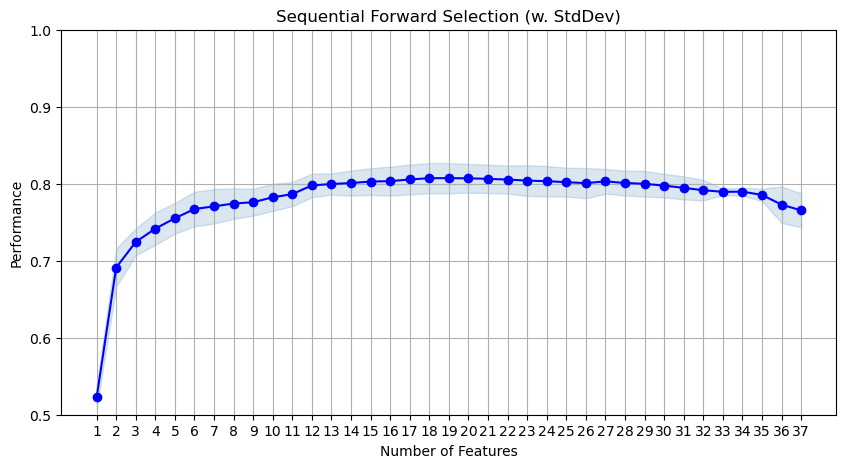

In [68]:
plot_sfs(sfs1.get_metric_dict(), figsize=(10, 5), kind='std_dev')
plt.ylim([0.5, 1.0])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

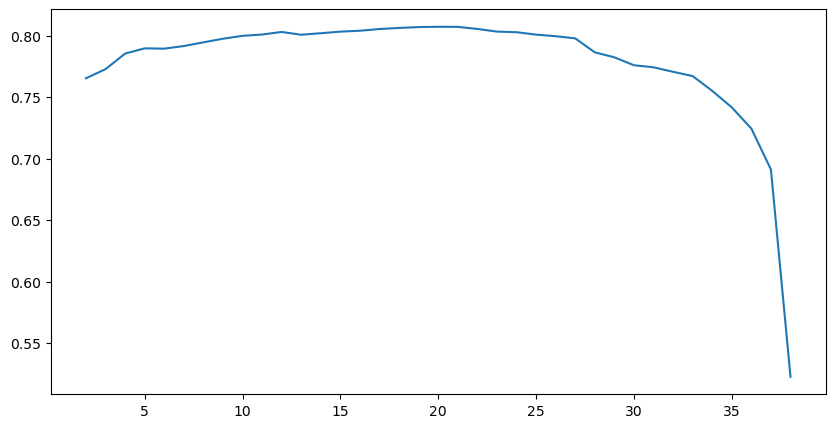

In [69]:
sf = pd.DataFrame(sfs1.subsets_).T
plt.figure(figsize=(10, 5))
plt.plot(range(38, 1, -1), sf['avg_score'])
plt.show()

In [70]:
sf

,feature_idx,cv_scores,avg_score,feature_names
1,"(13,)","[0.5110823909801913, 0.5426687416835585, 0.513...",0.522509,"(LSTAT,)"
2,"(13, 25)","[0.6947599504205894, 0.7193945800578567, 0.659...",0.691168,"(LSTAT, RM6)"
3,"(13, 25, 38)","[0.7436122535609571, 0.7285378232807231, 0.701...",0.724446,"(LSTAT, RM6, LSTAT2)"
4,"(11, 13, 25, 38)","[0.7675030330716774, 0.7411583808704048, 0.716...",0.741679,"(PTRATIO, LSTAT, RM6, LSTAT2)"
5,"(11, 13, 25, 28, 38)","[0.7794103716252941, 0.7555560878593165, 0.730...",0.755152,"(PTRATIO, LSTAT, RM6, DIS2, LSTAT2)"
6,"(1, 11, 13, 25, 28, 38)","[0.7859056395612652, 0.7799346209630206, 0.735...",0.767155,"(CRIM, PTRATIO, LSTAT, RM6, DIS2, LSTAT2)"
7,"(1, 11, 13, 19, 25, 28, 38)","[0.7912471262808075, 0.7810537726330216, 0.739...",0.770624,"(CRIM, PTRATIO, LSTAT, ZN6, RM6, DIS2, LSTAT2)"
8,"(1, 11, 12, 13, 19, 25, 28, 38)","[0.7949092492023682, 0.7805153592940193, 0.747...",0.774307,"(CRIM, PTRATIO, B, LSTAT, ZN6, RM6, DIS2, LSTAT2)"
9,"(1, 9, 11, 12, 13, 19, 25, 28, 38)","[0.7902461991076575, 0.7863144000661653, 0.751...",0.775965,"(CRIM, RAD, PTRATIO, B, LSTAT, ZN6, RM6, DIS2,..."
10,"(1, 9, 10, 11, 12, 13, 19, 25, 28, 38)","[0.7956925368045437, 0.7939538422538082, 0.757...",0.782407,"(CRIM, RAD, TAX, PTRATIO, B, LSTAT, ZN6, RM6, ..."


In [71]:
sf[sf['avg_score']==sf['avg_score'].max()]

,feature_idx,cv_scores,avg_score,feature_names
19,"(1, 4, 5, 8, 9, 10, 11, 12, 13, 19, 20, 25, 28...","[0.8017328562152873, 0.8336310996424532, 0.786...",0.807258,"(CRIM, CHAS, NOX, DIS, RAD, TAX, PTRATIO, B, L..."


In [72]:
sf2 = list(sf[sf['avg_score']==sf['avg_score'].max()]['feature_names'])
sf3 = list(sf2[0])

In [73]:
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X[sf3], y, test_size=0.3, random_state=44)

ss = StandardScaler()
X_trains = ss.fit_transform(X_train)
X_trains = pd.DataFrame(X_trains, columns=X_train.columns)
X_tests = ss.transform(X_test)
X_tests = pd.DataFrame(X_tests, columns=X_train.columns)

lir = LinearRegression()
lir.fit(X_trains, y_train)

y_test_pred = lir.predict(X_tests)

r2_score(y_test, y_test_pred)

0.8377067100561555

### 2.4. Step Backward Selection

In [75]:
# Build RF classifier to use in feature selection
lir = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(lir, k_features = 1, forward=False, floating=False, scoring='r2', verbose=2, cv=3)

# Perform SFFS
sfs1 = sfs1.fit(Xs, y)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s

[2024-12-07 10:34:33] Features: 39/1 -- score: 0.6325668478453311
[2024-12-07 10:34:33] Features: 38/1 -- score: 0.7664034417923139
[2024-12-07 10:34:34] Features: 37/1 -- score: 0.7914828775019404
[2024-12-07 10:34:35] Features: 36/1 -- score: 0.7967661394908486
[2024-12-07 10:34:35] Features: 35/1 -- score: 0.7992261982281953
[2024-12-07 10:34:36] Features: 34/1 -- score: 0.8014474835340737
[2024-12-07 10:34:37] Features: 33/1 -- score: 0.8035747575601263
[2024-12-07 10:34:37] Features: 32/1 -- score: 0.8050063551130787
[2024-12-07 10:34:38] Features: 31/1 -- score: 0.8075861120545703
[2024-12-07 10:34:38] Features: 30/1 -- score: 0.8081274622905044
[2024-12-07 10:34:39] Features: 29/1 -- score: 0.8086311769589957
[2024-12-07 10:34:39] Features: 28/1 -- score: 0.8091337696845322
[2024-12-07 10:34:40] Features: 27/1 -- score: 0.8100080809583371
[2024-12-07 10:34:4

In [76]:
sfs1.k_features

(1, 1)

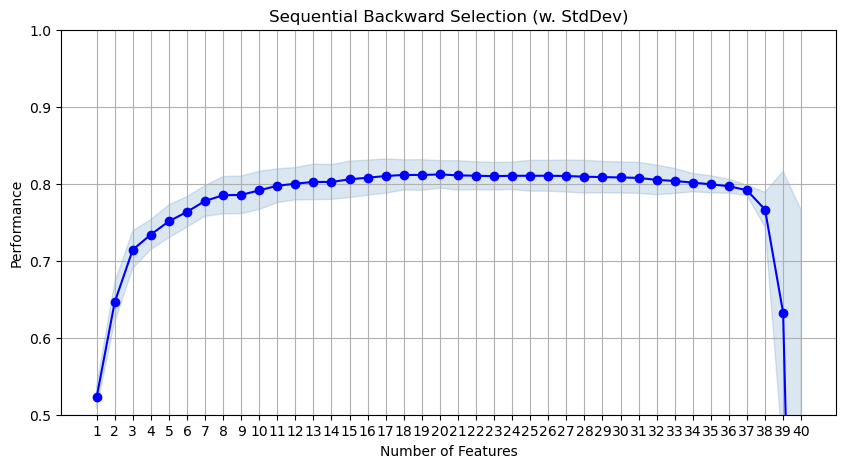

In [77]:
plot_sfs(sfs1.get_metric_dict(), kind='std_dev', figsize=(10, 5))
plt.ylim([0.5, 1.0])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

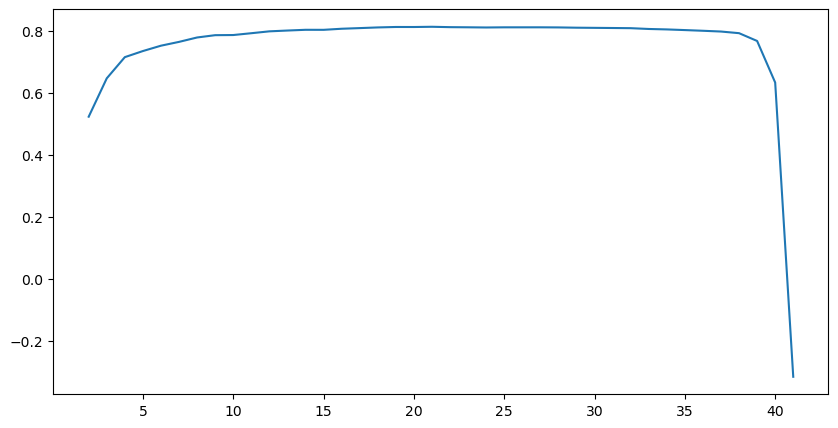

In [81]:
sf = pd.DataFrame(sfs1.subsets_).T
plt.figure(figsize=(10, 5))
plt.plot(range(41,1,-1), sf['avg_score'])
plt.show()

In [83]:
sf

,feature_idx,cv_scores,avg_score,feature_names
40,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5220431676967697, 0.3740402773834589, -1.84...",-0.314938,"(Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, A..."
39,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7370670165598019, 0.3745858651049895, 0.786...",0.632567,"(Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, A..."
38,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7346813767122793, 0.7815066286295442, 0.783...",0.766403,"(Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, A..."
37,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7900430134464624, 0.8002371592283373, 0.784...",0.791483,"(Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, A..."
36,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8013961575189938, 0.804913507657422, 0.7839...",0.796766,"(Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, A..."
35,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8065385890571776, 0.8075286191688347, 0.783...",0.799226,"(Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, A..."
34,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8086656397061021, 0.8109934510140561, 0.784...",0.801447,"(Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, A..."
33,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8025996054335162, 0.8239050483868061, 0.784...",0.803575,"(Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, A..."
32,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.802634104630491, 0.8296826305890019, 0.7827...",0.805006,"(Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, A..."
31,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8041821876318815, 0.8337832995988135, 0.784...",0.807586,"(Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, A..."


In [85]:
sf[sf['avg_score']==sf['avg_score'].max()]

,feature_idx,cv_scores,avg_score,feature_names
20,"(1, 4, 5, 6, 8, 9, 10, 11, 13, 19, 22, 23, 24,...","[0.8127534447082816, 0.8336743546959803, 0.789...",0.812081,"(CRIM, CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, ..."


In [87]:
sf2 = list(sf[sf['avg_score']==sf['avg_score'].max()]['feature_names'])
sf3 = list(sf2[0])
sf3

['CRIM',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'ZN6',
 'NOX2',
 'NOX6',
 'RM2',
 'RAD2',
 'TAX2',
 'TAX6',
 'PTRATIO2',
 'B2',
 'B6',
 'LSTAT2']

In [89]:
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X[sf3], y, test_size=0.3, random_state=44)

ss = StandardScaler()
X_trains = ss.fit_transform(X_train)
X_trains = pd.DataFrame(X_trains, columns=X_train.columns)
X_tests = ss.transform(X_test)
X_tests = pd.DataFrame(X_tests, columns=X_train.columns)

lir = LinearRegression()
lir.fit(X_trains, y_train)

y_test_pred = lir.predict(X_tests)

r2_score(y_test, y_test_pred)

0.8587357159783895

### Checking Non-linear Relationship

In [92]:
import statsmodels.api as sm

In [100]:
y = bos['price']
X = bos.drop('price', axis=1)

X = X[['LSTAT']]
X['LSTAT2'] = X['LSTAT']**2

In [102]:
Xc = sm.add_constant(X)

In [104]:
Xc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   const   506 non-null    float64
 1   LSTAT   506 non-null    float64
 2   LSTAT2  506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [106]:
model = sm.OLS(y, Xc.iloc[:,:2]).fit()
y1 = model.predict(Xc.iloc[:,:2])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           5.08e-88
Time:                        10:37:24   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
model2 = sm.OLS(y, Xc).fit()
y2 = model2.predict(Xc)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          1.56e-112
Time:                        10:37:24   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT         -2.3328      0.124    -18.843      0.000      -2.576      -2.090
LSTAT2         0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

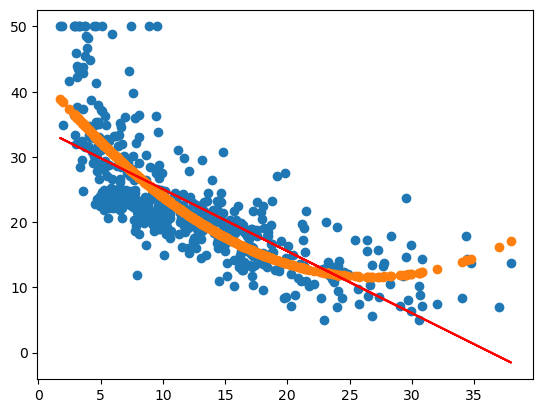

In [110]:
plt.scatter(X['LSTAT'], y)
plt.plot(X['LSTAT'], y1, 'r')
plt.scatter(X['LSTAT'], y2)
plt.show()